# Template Matching

#### Goals

• To find objects in an image using Template Matching

• You will see these functions : cv2.matchTemplate(), cv2.minMaxLoc()

Template Matching is a method for searching and finding the location of a template image in a larger image. OpenCV
comes with a function cv2.matchTemplate() for this purpose. It simply slides the template image over the input
image (as in 2D convolution) and compares the template and patch of input image under the template image.

Several
comparison methods are implemented in OpenCV. (You can check docs for more details). It returns a grayscale image,
where each pixel denotes how much does the neighbourhood of that pixel match with template.

If input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1).
Once you got the result, you can use cv2.minMaxLoc() function to find where is the maximum/minimum value. Take
it as the top-left corner of rectangle and take (w,h) as width and height of the rectangle. That rectangle is your region
of template.

We will try all the comparison methods so that we can see how their results look like:

We are using messi's face(shown below) as the template 

![](face.png)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

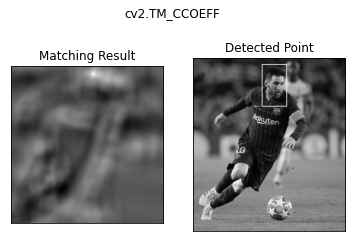

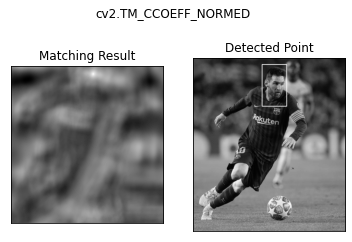

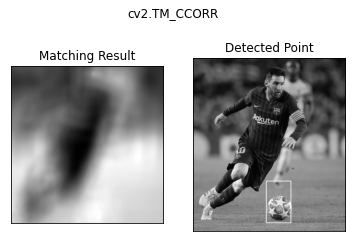

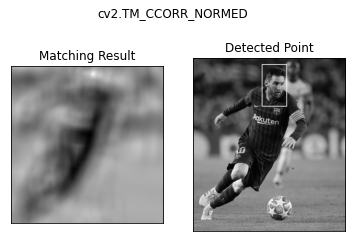

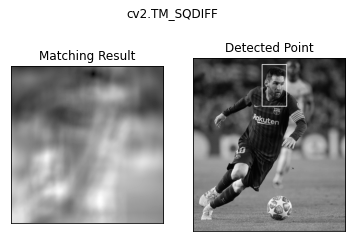

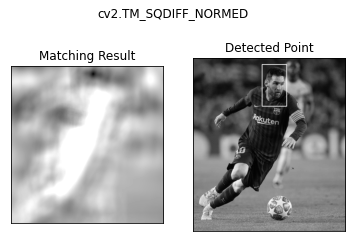

In [2]:
img = cv2.imread('Messi.jpg',0)
img2 = img.copy()
template = cv2.imread('face.png',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

You can see that the result using cv2.TM_CCORR is not good as we expected.

### Template Matching with Multiple Objects

In the previous section, we searched image for Messi’s face, which occurs only once in the image. Suppose you are
searching for an object which has multiple occurances, cv2.minMaxLoc() won’t give you all the locations. In that
case, we will use thresholding. So in this example, we will use a screenshot of the famous game Mario and we will
find the coins in it.

In [87]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('Mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('Coin.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2.imshow('image', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Transforms in OpenCV(Fourier Transform)

#### Goal

• To find the Fourier Transform of images using OpenCV

• To utilize the FFT functions available in Numpy

• Some applications of Fourier Transform

• We will see following functions : cv2.dft(), cv2.idft() etc

Fourier Transform is used to analyze the frequency characteristics of various filters. For images, 2D Discrete Fourier
Transform (DFT) is used to find the frequency domain. A fast algorithm called Fast Fourier Transform (FFT) is
used for calculation of DFT. Details about these can be found in any image processing or signal processing textbooks.

For a sinusoidal signal, x(t) = A sin(2πf t), we can say f is the frequency of signal, and if its frequency domain
is taken, we can see a spike at f . If signal is sampled to form a discrete signal, we get the same frequency domain,
but is periodic in the range [−π, π] or [0, 2π] (or [0, N ] for N-point DFT). You can consider an image as a signal
which is sampled in two directions. So taking fourier transform in both X and Y directions gives you the frequency
representation of image.

More intuitively, for the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high
frequency signal. If it varies slowly, it is a low frequency signal. You can extend the same idea to images. Where does
the amplitude varies drastically in images ? At the edge points, or noises. So we can say, edges and noises are high
frequency contents in an image. If there is no much changes in amplitude, it is a low frequency component.

#### Fourier Transform in Numpy

First we will see how to find Fourier Transform using Numpy. Numpy has an FFT package to do this. np.fft.fft2()
provides us the frequency transform which will be a complex array. Its first argument is the input image, which is
grayscale.

Second argument is optional which decides the size of output array. If it is greater than size of input image,
input image is padded with zeros before calculation of FFT. If it is less than input image, input image will be cropped.
If no arguments passed, Output array size will be same as input.

Now once you got the result, zero frequency component (DC component) will be at top left corner. If you want
to bring it to center, you need to shift the result by N/2 in both the directions. This is simply done by the function,
np.fft.fftshift(). (It is more easier to analyze). Once you found the frequency transform, you can find the magnitude
spectrum

(256, 256)


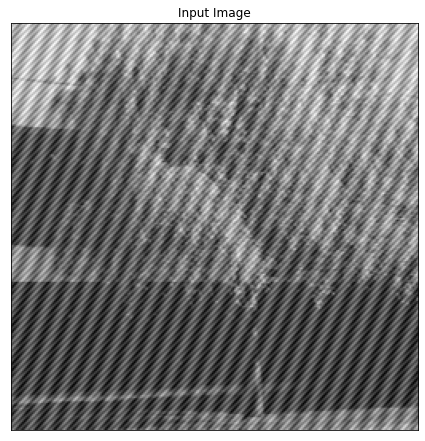

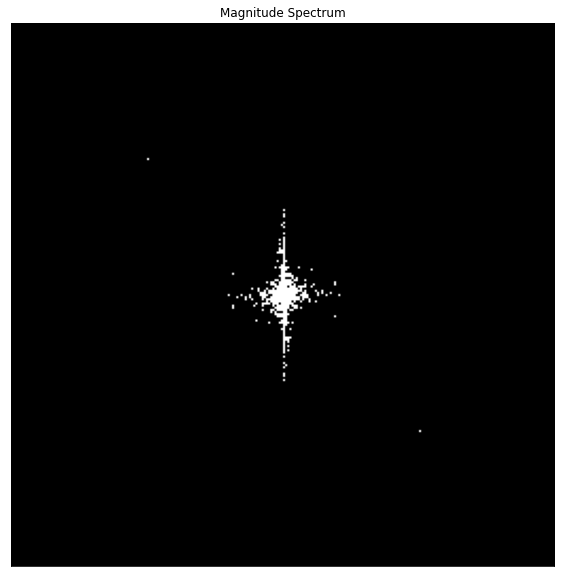

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('periodic.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
print(magnitude_spectrum.shape)

ret,th1 = cv2.threshold(magnitude_spectrum,200,255,cv2.THRESH_BINARY)

plt.figure(figsize = (75,7.5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.figure(figsize = (100,10))
plt.subplot(122),plt.imshow(th1, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

See, You can see more whiter region at the center showing low frequency content is more.

So you found the frequency transform Now you can do some operations in frequency domain, like high pass filtering
and reconstruct the image, ie find inverse DFT. For that you simply remove the low frequencies by masking with a
rectangular window of size 60x60. Then apply the inverse shift using np.fft.ifftshift() so that DC component again
come at the top-left corner. Then find inverse FFT using np.ifft2() function. The result, again, will be a complex
number. You can take its absolute value.

(Text(0.5, 1.0, 'Image after HPF'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

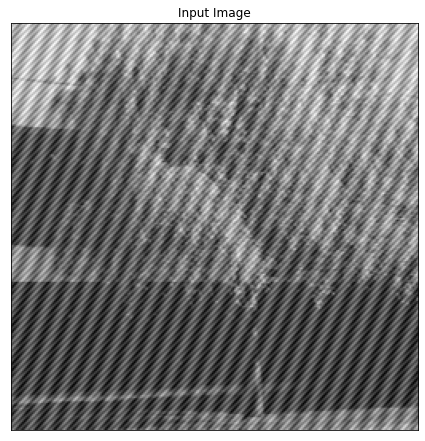

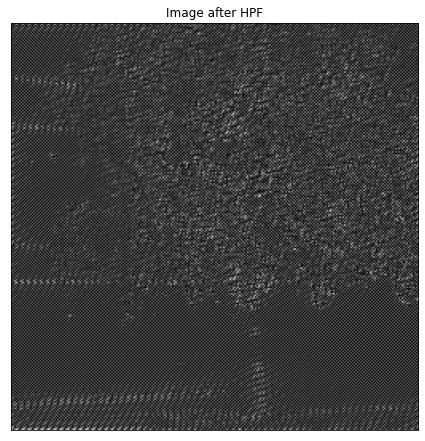

In [38]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

row,col=magnitude_spectrum.shape
midr=row//2
midc=col//2

mask=np.zeros((3,3),np.uint8)
cv2.imshow('Spikes1.jpg',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()
fshift[midr+9:midr+12,midc+23:midc+26]=mas
fshift[midr+63:midr+66,midc+63:midc+66]
fshift[midr-11:midr-8,midc-25:midc-22]
fshift[midr-65:midr-62,midc-65:midc-62]

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.figure(figsize = (75,7.5))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.figure(figsize = (75,7.5))
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

The result shows High Pass Filtering is an edge detection operation. This is what we have seen in Image Gradients
chapter. This also shows that most of the image data is present in the Low frequency region of the spectrum. Anyway
we have seen how to find DFT, IDFT etc in Numpy. Now let’s see how to do it in OpenCV.

### Fourier Transform in OpenCV

OpenCV provides the functions cv2.dft() and cv2.idft() for this. It returns the same result as previous, but with two
channels. First channel will have the real part of the result and second channel will have the imaginary part of the
result. The input image should be converted to np.float32 first. We will see how to do it.

(35, 160)


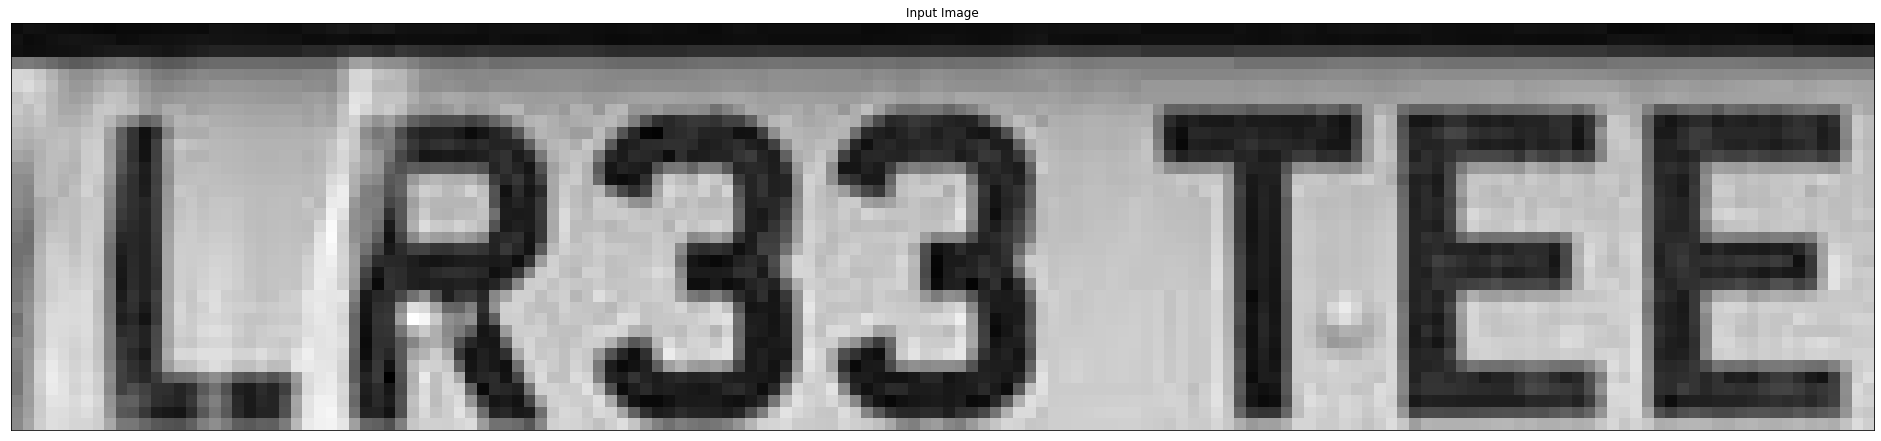

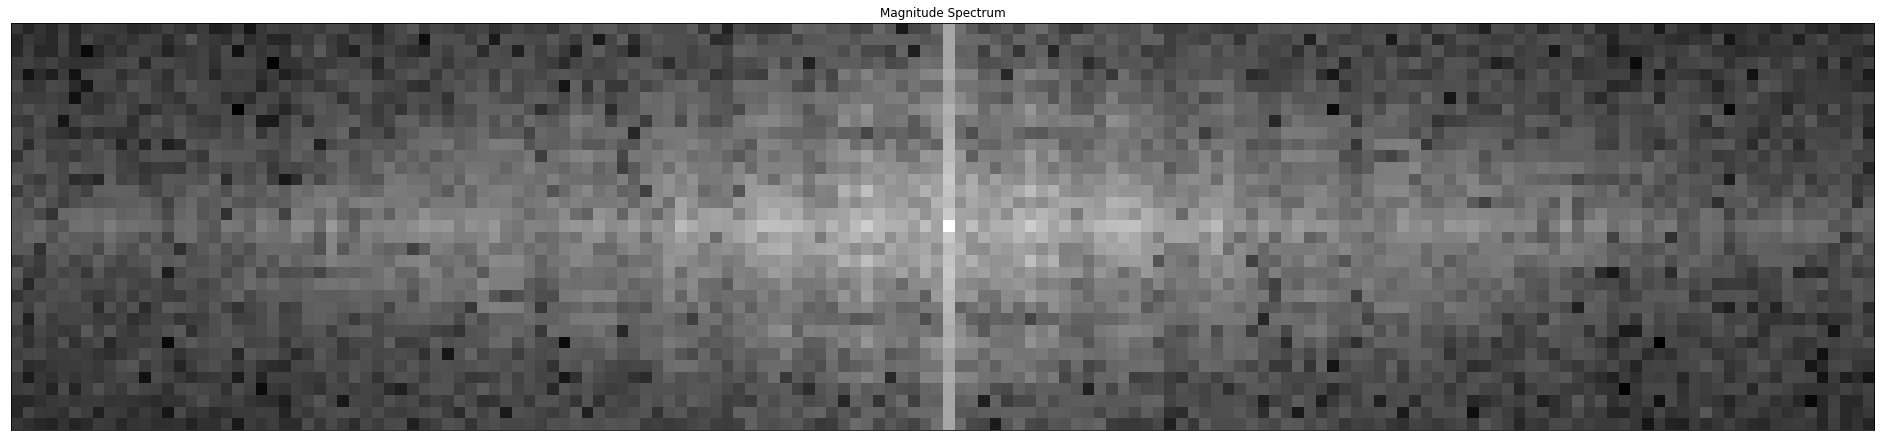

In [97]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('image2.jpg',0)
rows,col=img.shape
mid1=rows//2
mid2=col//2
plate=img[mid1-5:mid1+30,mid2-80:mid2+80]
dft = cv2.dft(np.float32(plate),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
print(magnitude_spectrum.shape)

plt.figure(figsize = (75,7.5))
plt.subplot(121),plt.imshow(plate, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.figure(figsize = (75,7.5))
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

So, now we have to do inverse DFT. In previous session, we created a HPF, this time we will see how to remove high
frequency contents in the image, ie we apply LPF to image. It actually blurs the image. For this, we create a mask first
with high value (1) at low frequencies, ie we pass the LF content, and 0 at HF region.

(35, 160)


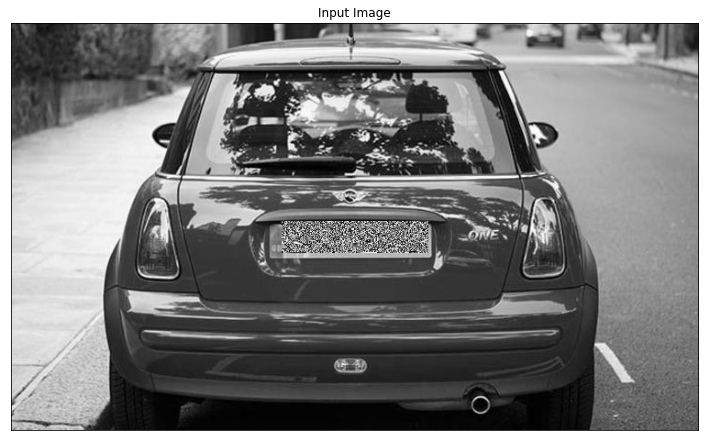

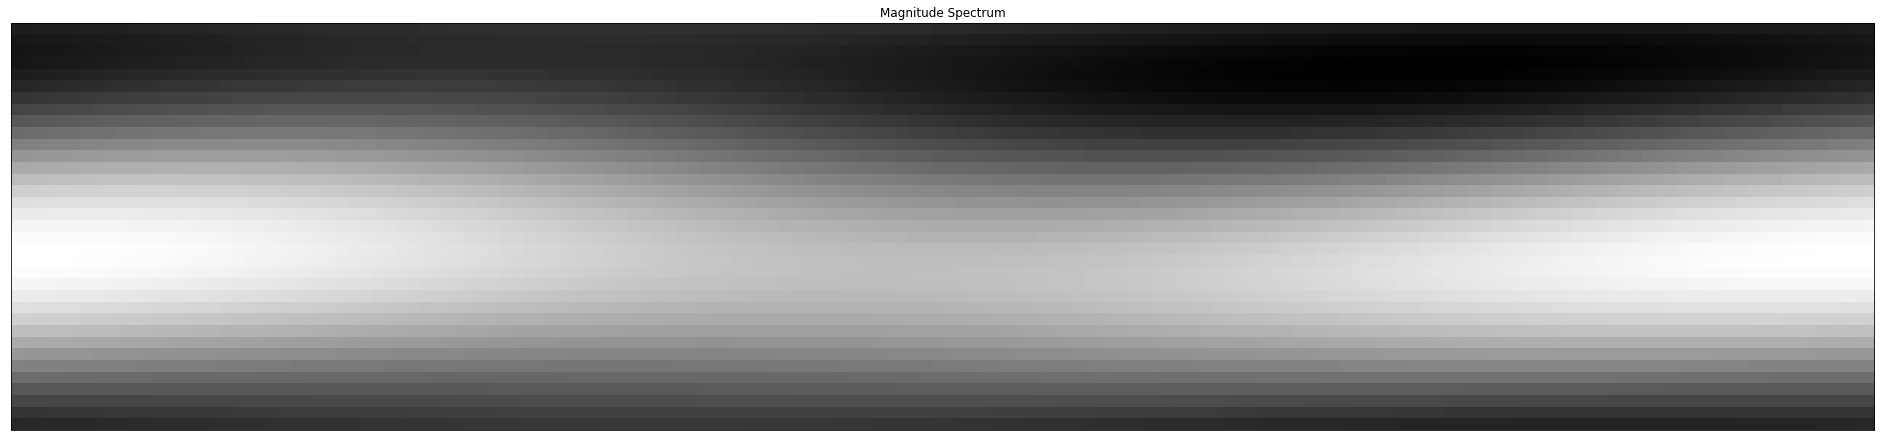

True

In [100]:
rows, cols = plate.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-1:crow+1, ccol-1:ccol+1] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
print(img_back.shape)

img[mid1-5:mid1+30,mid2-80:mid2+80]=img_back
plt.figure(figsize = (75,7.5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.figure(figsize = (75,7.5))
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('Car.jpg',img)

**Note**: As usual, OpenCV functions cv2.dft() and cv2.idft() are faster than Numpy counterparts. But Numpy functions
are more user-friendly.

# Hough Line Transform

#### Goal

• We will understand the concept of Hough Tranform.
• We will see how to use it detect lines in an image.
• We will see following functions: cv2.HoughLines(), cv2.HoughLinesP()

### What is Hough Transform?

Hough Transform is a popular technique to detect any shape, if you can represent that shape in mathematical form. It
can detect the shape even if it is broken or distorted a little bit. We will see how it works for a line.

A line can be represented as y = mx + c or in parametric form, as ρ = x cos θ + y sin θ where ρ is the perpendicular
distance from origin to the line, and θ is the angle formed by this perpendicular line and horizontal axis measured in
counter-clockwise ( That direction varies on how you represent the coordinate system. This representation is used in
OpenCV).

So if line is passing below the origin, it will have a positive rho and angle less than 180. If it is going above the origin,
instead of taking angle greater than 180, angle is taken less than 180, and rho is taken negative. Any vertical line will
have 0 degree and horizontal lines will have 90 degree.

Now let’s see how Hough Transform works for lines. Any line can be represented in these two terms, (ρ, θ). So first it
creates a 2D array or accumulator (to hold values of two parameters) and it is set to 0 initially. Let rows denote the ρ
and columns denote the θ. Size of array depends on the accuracy you need.

Suppose you want the accuracy of angles
to be 1 degree, you need 180 columns. For ρ, the maximum distance possible is the diagonal length of the image. So
taking one pixel accuracy, number of rows can be diagonal length of the image

In [ ]:
add sample images(pg 141 of pdf)

Consider a 100x100 image with a horizontal line at the middle. Take the first point of the line. You know its (x,y)
values. Now in the line equation, put the values θ = 0, 1, 2, ...., 180 and check the ρ you get. For every (ρ, θ) pair, you
increment value by one in our accumulator in its corresponding (ρ, θ) cells. So now in accumulator, the cell (50,90) =
1 along with some other cells.

Now take the second point on the line. Do the same as above. Increment the the values in the cells corresponding to
(ρ, θ) you got. This time, the cell (50,90) = 2. What you actually do is voting the (ρ, θ) values. You continue this
process for every point on the line. At each point, the cell (50,90) will be incremented or voted up, while other cells
may or may not be voted up. This way, at the end, the cell (50,90) will have maximum votes. So if you search the
accumulator for maximum votes, you get the value (50,90) which says, there is a line in this image at distance 50 from
origin and at angle 90 degrees.

This is how hough transform for lines works. It is simple, and may be you can implement it using Numpy on your
own. Below is an image which shows the accumulator. Bright spots at some locations denotes they are the parameters
of possible lines in the image.

### Hough Tranform in OpenCV

Everything explained above is encapsulated in the OpenCV function, cv2.HoughLines(). It simply returns an array
of (ρ, θ) values. ρ is measured in pixels and θ is measured in radians. First parameter, Input image should be a
binary image, so apply threshold or use canny edge detection before finding applying hough transform. 

Second and
third parameters are ρ and θ accuracies respectively. Fourth argument is the threshold, which means minimum vote it
should get for it to be considered as a line. Remember, number of votes depend upon number of points on the line. So
it represents the minimum length of line that should be detected.

In [8]:
import cv2
import numpy as np

img = cv2.imread('Sudoku.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

![](lines.jpg)

#### Probabilistic Hough Transform

In the hough transform, you can see that even for a line with two arguments, it takes a lot of computation. Probabilistic
Hough Transform is an optimization of Hough Transform we saw. It doesn’t take all the points into consideration,
instead take only a random subset of points and that is sufficient for line detection. Just we have to decrease the
threshold. 

• minLineLength - Minimum length of line. Line segments shorter than this are rejected.

• maxLineGap - Maximum allowed gap between line segments to treat them as single line.

Best thing is that, it directly returns the two endpoints of lines. In previous case, you got only the parameters of lines,
and you had to find all the points. Here, everything is direct and simple.

In [ ]:
import cv2
import numpy as np
img = cv2.imread('Sudoku.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

![](lines1.png)

In [65]:
print(img.shape)

(445, 750)
